In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report

In [2]:
my_data = pd.read_csv("C:/Users/Ibankole.AVD/OneDrive - Teesside University/DISSERTATION FOLDER/logistics_dataset_with_maintenance_required.csv")
print(my_data)
#"C:/Users/Ibankole.AVD/OneDrive - Teesside University/DISSERTATION FOLDER/logistics_dataset_with_maintenance_required.csv"
#"C:/Users/d3663842/OneDrive - Teesside University/DISSERTATION FOLDER/logistics_dataset_with_maintenance_required.csv"

       Vehicle_ID   Make_and_Model  Year_of_Manufacture Vehicle_Type  \
0               1       Ford F-150                 2022        Truck   
1               2         Volvo FH                 2015          Van   
2               3  Chevy Silverado                 2022          Van   
3               4  Chevy Silverado                 2011        Truck   
4               5       Ford F-150                 2014          Van   
...           ...              ...                  ...          ...   
91995       91996  Chevy Silverado                 2022          Van   
91996       91997       Ford F-150                 2006        Truck   
91997       91998       Tesla Semi                 2020          Van   
91998       91999       Tesla Semi                 2022        Truck   
91999       92000       Ford F-150                 2020          Van   

       Usage_Hours Route_Info  Load_Capacity  Actual_Load  \
0              530      Rural       7.534549     9.004247   
1            

In [3]:
my_data.isna().sum()

Vehicle_ID               0
Make_and_Model           0
Year_of_Manufacture      0
Vehicle_Type             0
Usage_Hours              0
Route_Info               0
Load_Capacity            0
Actual_Load              0
Last_Maintenance_Date    0
Maintenance_Type         0
Maintenance_Cost         0
Engine_Temperature       0
Tire_Pressure            0
Fuel_Consumption         0
Battery_Status           0
Vibration_Levels         0
Oil_Quality              0
Brake_Condition          0
Failure_History          0
Anomalies_Detected       0
Predictive_Score         0
Maintenance_Required     0
Weather_Conditions       0
Road_Conditions          0
Delivery_Times           0
Downtime_Maintenance     0
Impact_on_Efficiency     0
dtype: int64

In [4]:
my_data.nunique()

Vehicle_ID               92000
Make_and_Model               4
Year_of_Manufacture         18
Vehicle_Type                 2
Usage_Hours              11975
Route_Info                   3
Load_Capacity            91999
Actual_Load              91999
Last_Maintenance_Date      547
Maintenance_Type             3
Maintenance_Cost         91999
Engine_Temperature           1
Tire_Pressure            33079
Fuel_Consumption         43004
Battery_Status            4993
Vibration_Levels         91999
Oil_Quality              89906
Brake_Condition              3
Failure_History              2
Anomalies_Detected           2
Predictive_Score         91995
Maintenance_Required         2
Weather_Conditions           4
Road_Conditions              3
Delivery_Times           63594
Downtime_Maintenance     36761
Impact_on_Efficiency     71217
dtype: int64

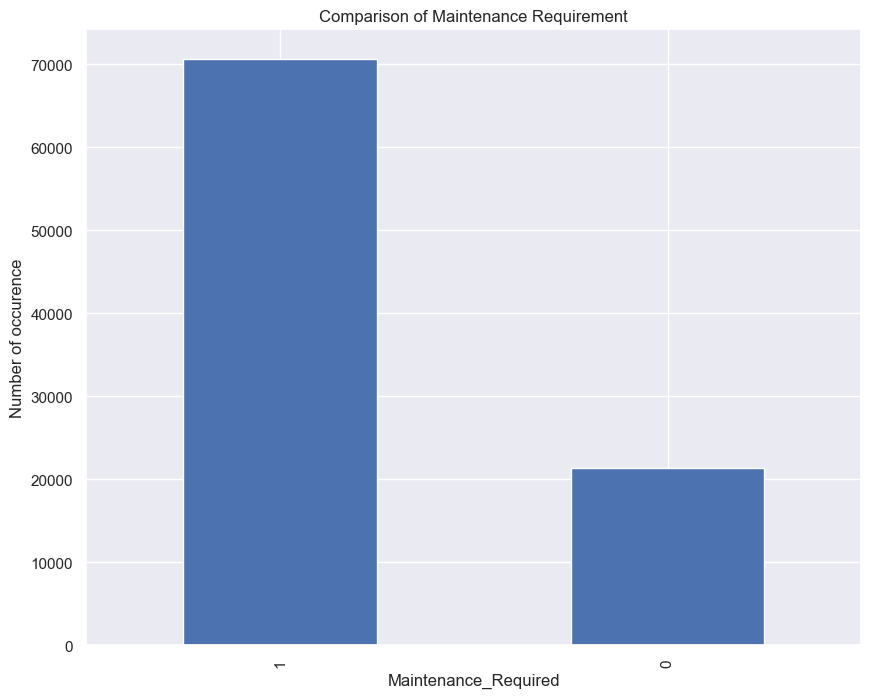

In [5]:
occurence = my_data['Maintenance_Required'].value_counts()[:10] #visualizing how the different weather conditions occurred over time
occurence.plot(kind='bar',figsize=(10,8))
plt.title('Comparison of Maintenance Requirement')
plt.ylabel('Number of occurence')
plt.show()

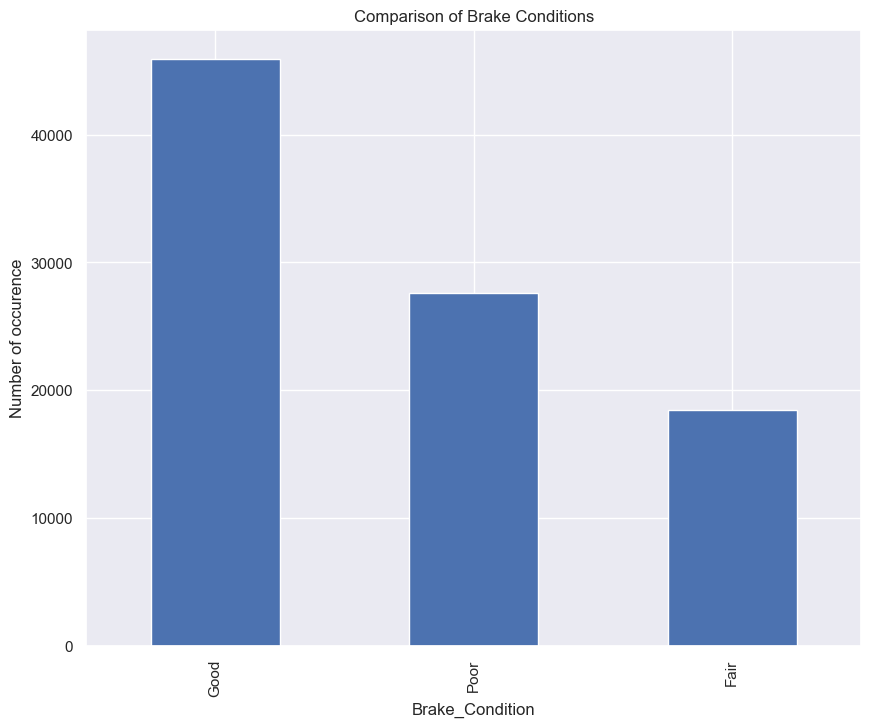

In [6]:
#We check the frequency of occurence for brake_condition values
occurence = my_data['Brake_Condition'].value_counts()[:10] #visualizing how the different weather conditions occurred over time
occurence.plot(kind='bar',figsize=(10,8))
plt.title('Comparison of Brake Conditions')
plt.ylabel('Number of occurence')
plt.show()

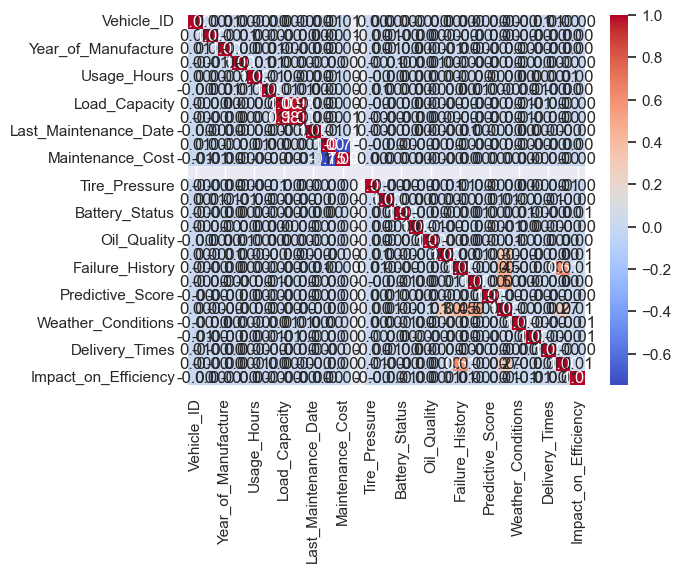

In [7]:
from sklearn.preprocessing import LabelEncoder

# Define categorical columns to encode
categorical_cols = ["Make_and_Model", "Vehicle_Type", "Maintenance_Type", "Route_Info", "Weather_Conditions", "Road_Conditions", "Last_Maintenance_Date", "Brake_Condition"]

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    my_data[col] = label_encoder.fit_transform(my_data[col])

# Compute correlation matrix
heatmap = my_data.corr()

# Plot heatmap
sns.heatmap(heatmap, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

#Run the whole data without removing columns

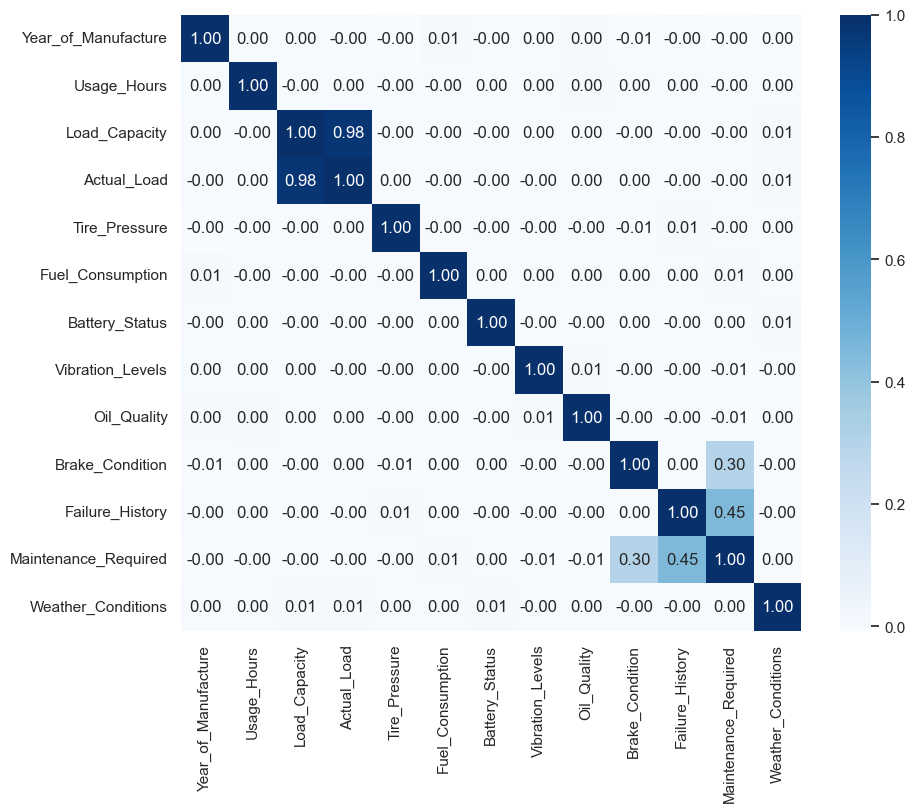

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.preprocessing import LabelEncoder

# Compute correlation matrix
heatmap = my_data.drop(columns = ["Make_and_Model", "Vehicle_Type", "Maintenance_Type", "Route_Info", "Road_Conditions", "Last_Maintenance_Date", "Vehicle_ID", "Maintenance_Cost", "Delivery_Times", "Predictive_Score", "Impact_on_Efficiency", "Anomalies_Detected", "Downtime_Maintenance", "Engine_Temperature"]).corr()

# Plot heatmap
plt.figure(figsize = (10,8))
sns.heatmap(heatmap, annot=True, cmap="Blues", fmt=".2f")
plt.show()
plt.savefig('heatmap.png', dpi=300)
#Here we remove some unnecessary columns

<Figure size 1300x1700 with 0 Axes>

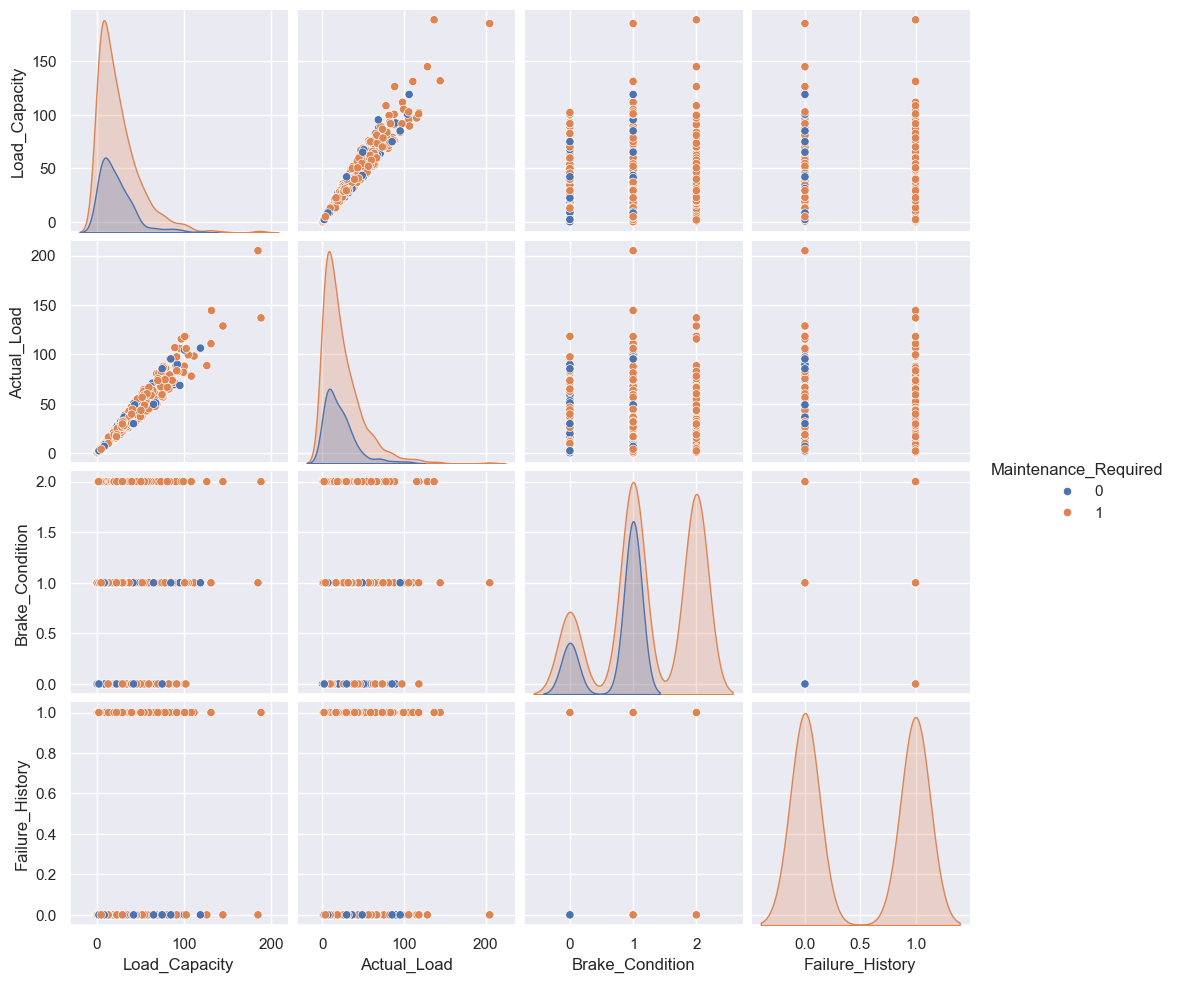

In [9]:
 #pairplot to compare the correlation and relationship between features
selected_columns = ["Load_Capacity", "Actual_Load", "Brake_Condition", "Failure_History"]

plt.figure(figsize=(13, 17))  # Set figure size

# Create pairplot with only selected columns
sns.pairplot(data=my_data.sample(1000), vars=selected_columns, diag_kind='kde', hue='Maintenance_Required')

plt.show()

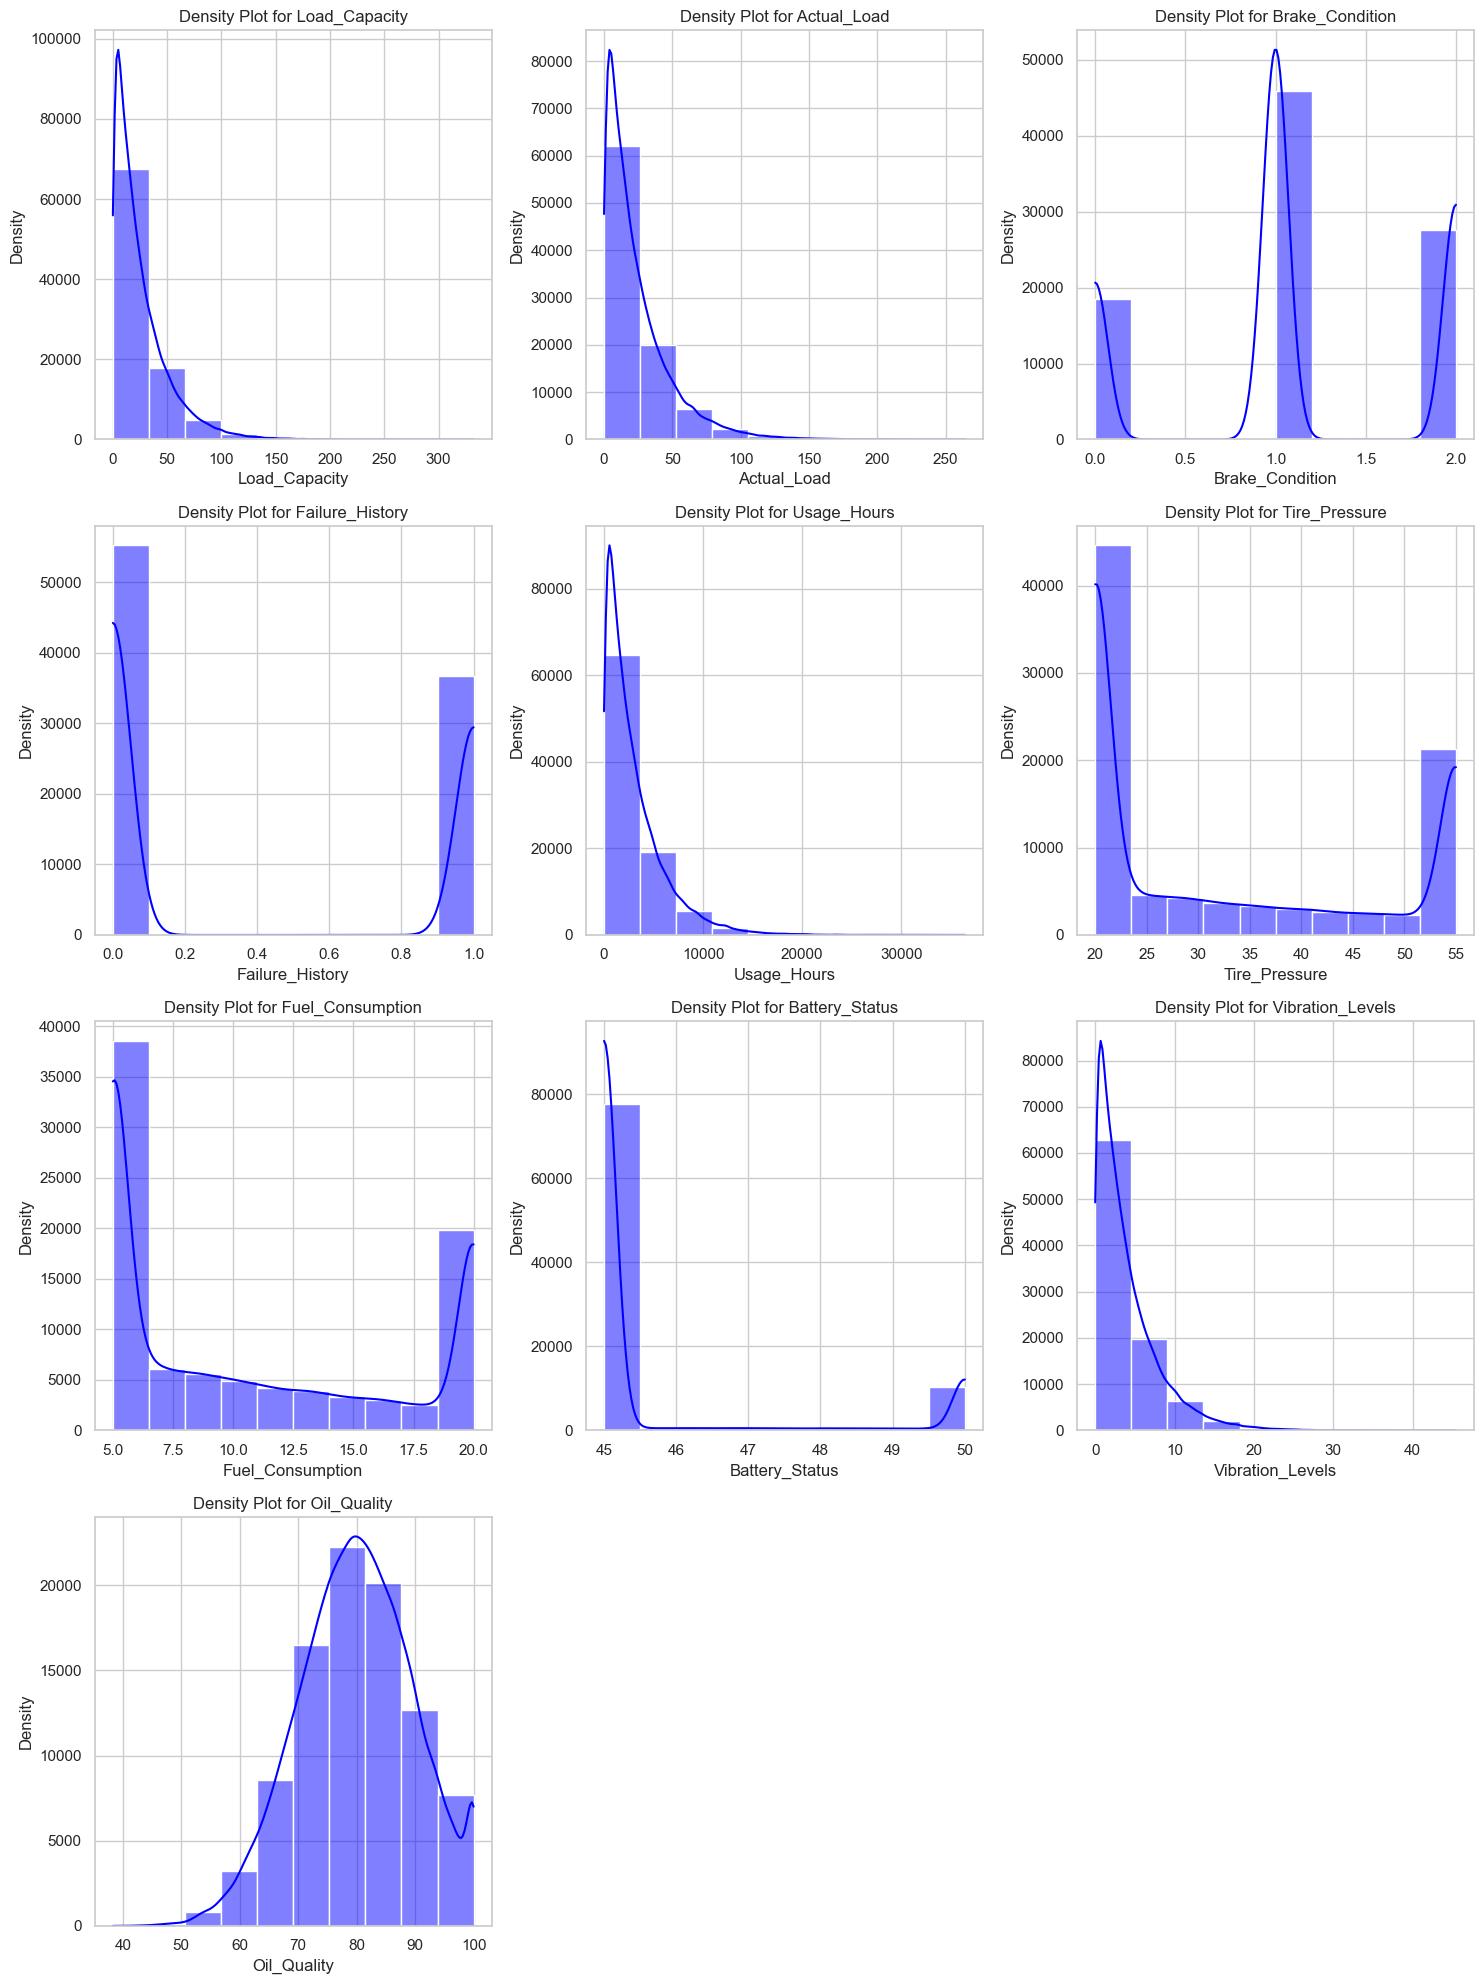

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

data = my_data
numeric = ['Load_Capacity', 'Actual_Load', 'Brake_Condition', 'Failure_History', 
           'Usage_Hours', 'Tire_Pressure', 'Fuel_Consumption', 'Battery_Status', 
           'Vibration_Levels', 'Oil_Quality']

sns.set(style="whitegrid")
plt.figure(figsize=(15, 20))

# Use a grid of 4 rows x 3 columns
for i, var in enumerate(numeric, 1):  
    plt.subplot(4, 3, i)  
    sns.histplot(data[var], kde=True, color='blue', bins=10)
    plt.title(f'Density Plot for {var}')
    plt.xlabel(var)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


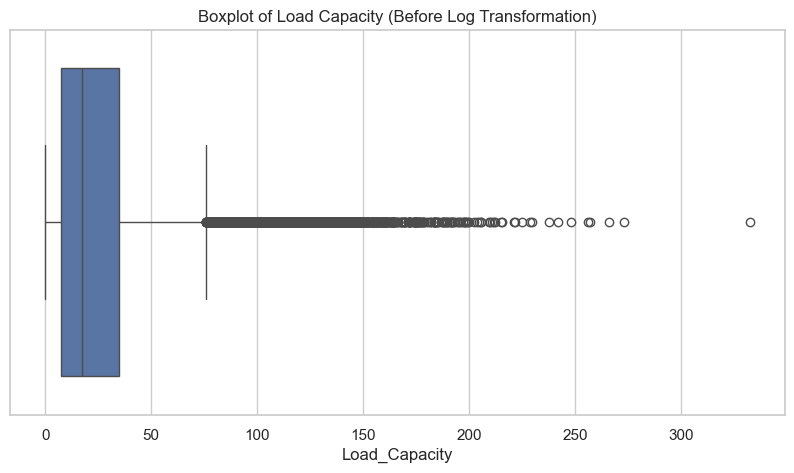

In [11]:
#check for outliers in load_capacity and actual_load columns
plt.figure(figsize=(10,5))
sns.boxplot(x=my_data["Load_Capacity"])
plt.title("Boxplot of Load Capacity (Before Log Transformation)")
plt.show()

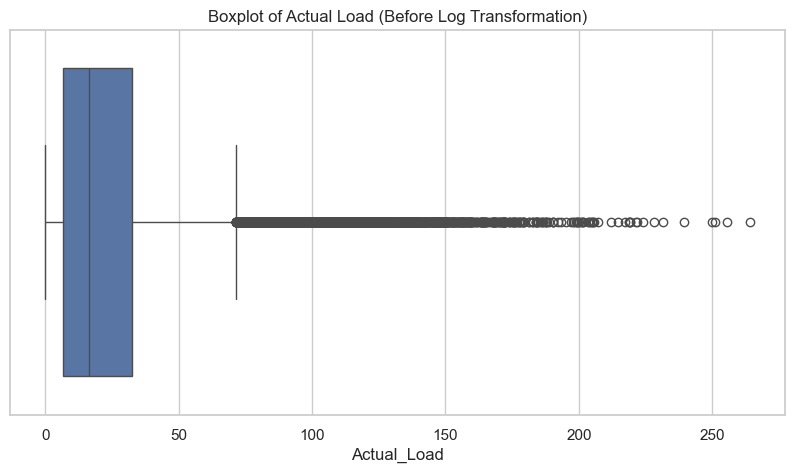

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=my_data["Actual_Load"])
plt.title("Boxplot of Actual Load (Before Log Transformation)")
plt.show()

In [13]:
skewness = my_data.skew()
print(skewness)


Vehicle_ID               0.000000
Make_and_Model           0.837966
Year_of_Manufacture     -0.899400
Vehicle_Type            -0.212055
Usage_Hours              1.994019
Route_Info               0.496472
Load_Capacity            2.000656
Actual_Load              2.083024
Last_Maintenance_Date   -0.012542
Maintenance_Type        -0.232939
Maintenance_Cost         1.853204
Engine_Temperature       0.000000
Tire_Pressure            0.605656
Fuel_Consumption         0.543005
Battery_Status           2.147205
Vibration_Levels         2.052633
Oil_Quality             -0.127423
Brake_Condition         -0.139707
Failure_History          0.410104
Anomalies_Detected       0.192101
Predictive_Score         0.915866
Maintenance_Required    -1.269763
Weather_Conditions       2.599173
Road_Conditions          0.277149
Delivery_Times           1.182071
Downtime_Maintenance     3.074602
Impact_on_Efficiency     1.151765
dtype: float64


In [14]:
#To deal with skewed columns; Load_Capacity and Actual_Load using log transformation
my_data["Load_Capacity_Log"] = np.log1p(my_data["Load_Capacity"])
my_data["Actual_Load_Log"] = np.log1p(my_data["Actual_Load"])
my_data["Usage_Hours_Log"] = np.log1p(my_data["Usage_Hours"])
my_data["Maintenance_Cost_Log"] = np.log1p(my_data["Maintenance_Cost"])
my_data["Battery_Status_Log"] = np.log1p(my_data["Battery_Status"])
my_data["Vibration_Levels_Log"] = np.log1p(my_data["Vibration_Levels"])
my_data["Weather_Conditions_Log"] = np.log1p(my_data["Weather_Conditions"])
my_data["Downtime_Maintenance_Log"] = np.log1p(my_data["Downtime_Maintenance"])

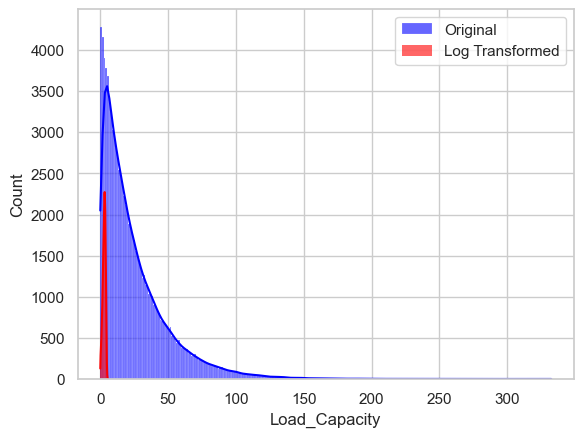

In [15]:
#To compare the density plots before and after log transformation for load_capacity
sns.histplot(my_data["Load_Capacity"], kde=True, color="blue", label="Original", alpha=0.6)
sns.histplot(my_data["Load_Capacity_Log"], kde=True, color="red", label="Log Transformed", alpha=0.6)
plt.legend()
plt.show()

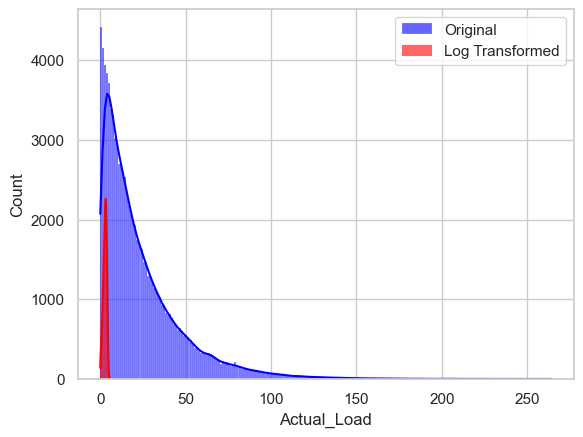

In [16]:
#To compare the density plots before and after log transformation for actual_load
sns.histplot(my_data["Actual_Load"], kde=True, color="blue", label="Original", alpha=0.6)
sns.histplot(my_data["Actual_Load_Log"], kde=True, color="red", label="Log Transformed", alpha=0.6)
plt.legend()
plt.show()

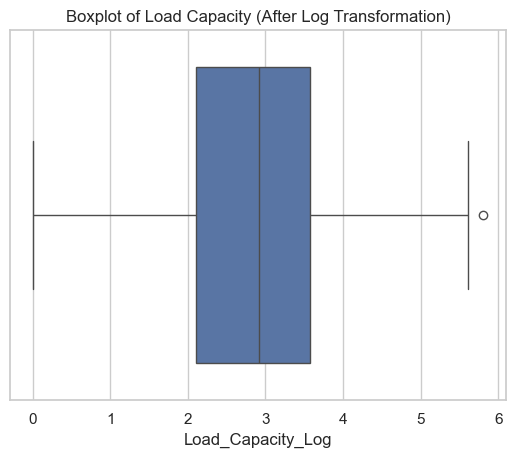

In [17]:
#To compare the boxplot before and after log transformation
sns.boxplot(x=my_data["Load_Capacity_Log"])
plt.title("Boxplot of Load Capacity (After Log Transformation)")
plt.show()

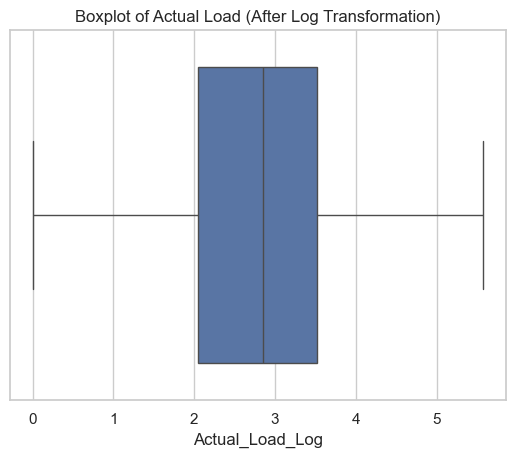

In [18]:
#To compare the boxplot before and after log transformation
sns.boxplot(x=my_data["Actual_Load_Log"])
plt.title("Boxplot of Actual Load (After Log Transformation)")
plt.show()

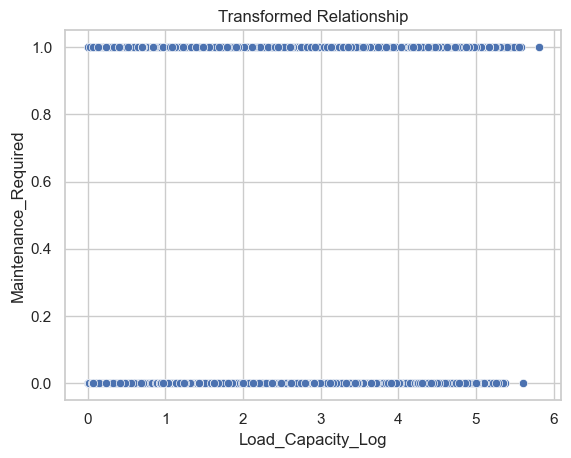

In [19]:
sns.scatterplot(x=my_data["Load_Capacity_Log"], y=my_data["Maintenance_Required"])
plt.title("Transformed Relationship")
plt.show()


In [20]:
#All columns are normalized now
#We analyze brake_condition class distribution and its relationship with maintenance needs wih Good = 2, Poor = 1, Fair = 0

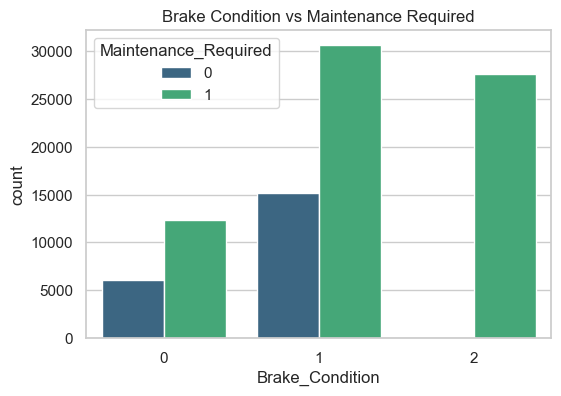

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="Brake_Condition", hue="Maintenance_Required", data=my_data, palette="viridis")
plt.title("Brake Condition vs Maintenance Required")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

Y = my_data['Maintenance_Required']
X = my_data.drop(columns=['Vehicle_ID', 'Make_and_Model', 'Year_of_Manufacture', 'Vehicle_Type', 
                          'Route_Info', 'Last_Maintenance_Date', 'Engine_Temperature', 
                          'Predictive_Score', 'Road_Conditions', 
                          'Weather_Conditions', 'Delivery_Times', 'Maintenance_Required', 'Downtime_Maintenance_Log', 'Failure_History', 'Anomalies_Detected'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")


X_train shape: (64400, 20), Y_train shape: (64400,)


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")


X_train_scaled shape: (64400, 20)


KNN CLASSIFIER

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [25]:
Y_pred = knn.predict(X_test_scaled)


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.7277536231884058
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.27      0.32      6404
           1       0.80      0.86      0.83     21196

    accuracy                           0.73     27600
   macro avg       0.59      0.57      0.57     27600
weighted avg       0.70      0.73      0.71     27600

Confusion Matrix:
 [[ 1752  4652]
 [ 2862 18334]]


In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_neighbors': 9}


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [29]:
Y_pred = knn.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.7388768115942029
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.21      0.27      6404
           1       0.79      0.90      0.84     21196

    accuracy                           0.74     27600
   macro avg       0.59      0.55      0.56     27600
weighted avg       0.70      0.74      0.71     27600

Confusion Matrix:
 [[ 1337  5067]
 [ 2140 19056]]


In [31]:
correlation = my_data.corr()
print(correlation["Maintenance_Required"].sort_values(ascending=False))


Maintenance_Required        1.000000
Anomalies_Detected          0.499375
Failure_History             0.448371
Downtime_Maintenance_Log    0.383039
Brake_Condition             0.302963
Downtime_Maintenance        0.274428
Impact_on_Efficiency        0.007060
Fuel_Consumption            0.005376
Vehicle_ID                  0.002619
Make_and_Model              0.001608
Maintenance_Cost_Log        0.001549
Weather_Conditions_Log      0.001296
Battery_Status              0.000771
Battery_Status_Log          0.000759
Maintenance_Cost            0.000593
Route_Info                  0.000561
Weather_Conditions          0.000266
Delivery_Times              0.000261
Actual_Load                -0.000382
Usage_Hours                -0.000459
Tire_Pressure              -0.000601
Road_Conditions            -0.000972
Load_Capacity              -0.001009
Maintenance_Type           -0.001172
Vehicle_Type               -0.001359
Actual_Load_Log            -0.001468
Load_Capacity_Log          -0.001768
U

RANDOM FOREST

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default with 100 trees

# Train the model on the training data
rf_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_test_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy on Test Set:", accuracy_score(Y_test, Y_test_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))


Accuracy on Test Set: 0.798695652173913

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.72      0.62      6404
           1       0.91      0.82      0.86     21196

    accuracy                           0.80     27600
   macro avg       0.73      0.77      0.74     27600
weighted avg       0.82      0.80      0.81     27600


Confusion Matrix:
[[ 4614  1790]
 [ 3766 17430]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Random Forest model with the best parameters
rf_tuned_model = RandomForestClassifier(
    max_depth=20,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

# Train the model on the training data
rf_tuned_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_test_pred_tuned = rf_tuned_model.predict(X_test_scaled)

# Evaluate the tuned model
print("Accuracy of Tuned Random Forest on Test Set:", accuracy_score(Y_test, Y_test_pred_tuned))

print("\nClassification Report for Tuned Random Forest:")
print(classification_report(Y_test, Y_test_pred_tuned))

print("\nConfusion Matrix for Tuned Random Forest:")
print(confusion_matrix(Y_test, Y_test_pred_tuned))


Accuracy of Tuned Random Forest on Test Set: 0.807463768115942

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.55      0.87      0.68      6404
           1       0.95      0.79      0.86     21196

    accuracy                           0.81     27600
   macro avg       0.75      0.83      0.77     27600
weighted avg       0.86      0.81      0.82     27600


Confusion Matrix for Tuned Random Forest:
[[ 5542   862]
 [ 4452 16744]]


GRADIENT BOOSTING CLASSIFIER

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_test_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting - Accuracy on Test Set:", accuracy_score(Y_test, Y_test_pred_gb))

print("\nGradient Boosting - Classification Report:")
print(classification_report(Y_test, Y_test_pred_gb))

print("\nGradient Boosting - Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred_gb))


Gradient Boosting - Accuracy on Test Set: 0.8122101449275362

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.71      6404
           1       0.99      0.76      0.86     21196

    accuracy                           0.81     27600
   macro avg       0.77      0.87      0.78     27600
weighted avg       0.89      0.81      0.83     27600


Gradient Boosting - Confusion Matrix:
[[ 6272   132]
 [ 5051 16145]]


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_scaled, Y_train)
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_tuned_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
gb_tuned_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_test_pred_gb_tuned = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting - Accuracy on Test Set:", accuracy_score(Y_test, Y_test_pred_gb_tuned))

print("\nGradient Boosting - Classification Report:")
print(classification_report(Y_test, Y_test_pred_gb_tuned))

print("\nGradient Boosting - Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred_gb_tuned))


Gradient Boosting - Accuracy on Test Set: 0.8122101449275362

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.98      0.71      6404
           1       0.99      0.76      0.86     21196

    accuracy                           0.81     27600
   macro avg       0.77      0.87      0.78     27600
weighted avg       0.89      0.81      0.83     27600


Gradient Boosting - Confusion Matrix:
[[ 6272   132]
 [ 5051 16145]]


SUPPORT VECTOR MACHINE

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model (using RBF kernel by default)
svm_model = SVC(C=1.0, kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_test_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM - Accuracy on Test Set:", accuracy_score(Y_test, Y_test_pred_svm))

print("\nSVM - Classification Report:")
print(classification_report(Y_test, Y_test_pred_svm))

print("\nSVM - Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred_svm))


SVM - Accuracy on Test Set: 0.7679710144927536

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6404
           1       0.77      1.00      0.87     21196

    accuracy                           0.77     27600
   macro avg       0.38      0.50      0.43     27600
weighted avg       0.59      0.77      0.67     27600


SVM - Confusion Matrix:
[[    0  6404]
 [    0 21196]]


C:\Users\Ibankole.AVD\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ibankole.AVD\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ibankole.AVD\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [38]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, Y_train)
print("Best Parameters for SVM:", grid_search_svm.best_params_)


Best Parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the SVM model (using RBF kernel by default)
svm_tuned_model = SVC(C=10, kernel='poly', gamma='scale', random_state=42)

# Train the model
svm_tuned_model.fit(X_train_scaled, Y_train)

# Make predictions on the test data
Y_test_pred_svm_tuned = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Tuned SVM - Accuracy on Test Set:", accuracy_score(Y_test, Y_test_pred_svm))

print("\nTuned SVM - Classification Report:")
print(classification_report(Y_test, Y_test_pred_svm_tuned))

print("\nTuned SVM - Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred_svm_tuned))


Tuned SVM - Accuracy on Test Set: 0.7679710144927536

Tuned SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6404
           1       0.77      1.00      0.87     21196

    accuracy                           0.77     27600
   macro avg       0.38      0.50      0.43     27600
weighted avg       0.59      0.77      0.67     27600


Tuned SVM - Confusion Matrix:
[[    0  6404]
 [    0 21196]]


C:\Users\Ibankole.AVD\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ibankole.AVD\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ibankole.AVD\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

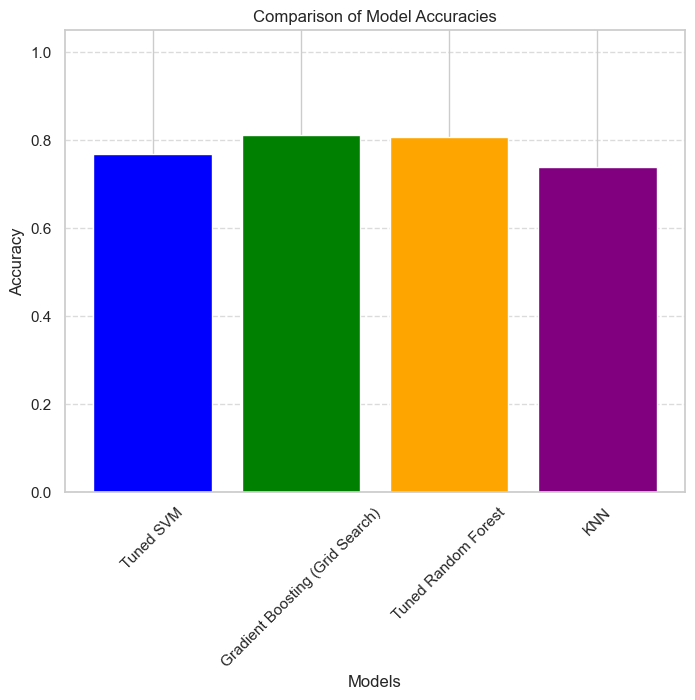

In [40]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
model_names = ['Tuned SVM', 'Gradient Boosting (Grid Search)', 'Tuned Random Forest', 'KNN']
model_accuracies = [
    accuracy_score(Y_test, Y_test_pred_svm_tuned),  # Accuracy for Tuned SVM
    accuracy_score(Y_test, Y_test_pred_gb_tuned),        # Accuracy for Gradient Boosting
    accuracy_score(Y_test, Y_test_pred_tuned),     # Accuracy for Tuned Random Forest
    accuracy_score(Y_test, Y_pred)                # Accuracy for KNN
]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.ylim(0.0, 1.05)  # Adjust y-axis to better visualize differences in accuracy
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
